In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = os.path.join(f"/home/dftml/Project/Sensor", "Gas_Sensor/")
os.chdir(path)
files = sorted(os.listdir())

In [3]:
for i in range(len(files)):
    df = pd.read_csv(f'/home/dftml/Project/Sensor/Gas_Sensor/{files[i]}')
    col = {i : i.split()[0] for i in df.columns}
    df.rename(columns=col, inplace=True)
    
    
    df_actual = df[(df["Flow"] >=235) & (df["Flow"] <=246)]
    df_actual = df_actual[df_actual["Temperature"] >= 21]
    
    df_actual["Heater"] = df_actual["Heater"].apply(lambda x: round(x,1))
    df_actual["Flow"] = df_actual["Flow"].apply(lambda x: int(x))
    df_actual["Humidity"] = df_actual["Humidity"].apply(lambda x: int(x))
    df_actual.drop("Time", axis =1, inplace =True)
    
    df_actual["CO"].where(~((df["CO"]>=0) & (df["CO"]<6)),"Low", inplace=True)
    df_actual["CO"].where(~((df["CO"]>=6) & (df["CO"]<13)),"Moderate", inplace=True)
    df_actual["CO"].where(~(df["CO"]>=13),"High", inplace=True)
    
    df_actual["Sensor_1"] = (df_actual["R1"] + df_actual["R2"] + df_actual["R3"] + df_actual["R4"] + df_actual["R5"] + df_actual["R6"] + df_actual["R7"])/7
    df_actual["Sensor_2"] = (df_actual["R8"] + df_actual["R9"] + df_actual["R10"] + df_actual["R11"] + df_actual["R12"] + df_actual["R13"] + df_actual["R14"])/7
    
    df_ind = df_actual[["Humidity","Temperature", "Flow", "Heater", "Sensor_1", "Sensor_2"]]
    df_dep = df_actual["CO"]
    
    exec(f"actual_{i+1} = df_actual")
    exec(f"df_ind{i+1} = df_ind")
    exec(f"df_dep{i+1} = df_dep")

In [4]:
data = pd.read_csv("/home/dftml/Project/Sensor_Gas/Gas_Sensor/20161007_210049.csv")

In [5]:
df = data.copy()

In [6]:
col = {i : i.split()[0] for i in df.columns}
df.rename(columns=col, inplace=True)

df_actual = df[(df["Flow"] >=235) & (df["Flow"] <=246)]
df_actual = df_actual[df_actual["Temperature"] >= 21]

df_actual["Heater"] = df_actual["Heater"].apply(lambda x: round(x,1))
df_actual["Flow"] = df_actual["Flow"].apply(lambda x: int(x))
df_actual["Humidity"] = df_actual["Humidity"].apply(lambda x: int(x))
df_actual.drop("Time", axis =1, inplace =True)

df_actual["CO"].where(~((df["CO"]>=0) & (df["CO"]<6)),"Low", inplace=True)
df_actual["CO"].where(~((df["CO"]>=6) & (df["CO"]<13)),"Moderate", inplace=True)
df_actual["CO"].where(~(df["CO"]>=13),"High", inplace=True)

df_actual["Sensor_1"] = (df_actual["R1"] + df_actual["R2"] + df_actual["R3"] + df_actual["R4"] + df_actual["R5"] + df_actual["R6"] + df_actual["R7"])/7
df_actual["Sensor_2"] = (df_actual["R8"] + df_actual["R9"] + df_actual["R10"] + df_actual["R11"] + df_actual["R12"] + df_actual["R13"] + df_actual["R14"])/7

X_train = df_actual[["Humidity","Temperature", "Flow", "Heater", "Sensor_1", "Sensor_2"]]
y_train = df_actual["CO"]

<AxesSubplot: xlabel='index', ylabel='CO'>

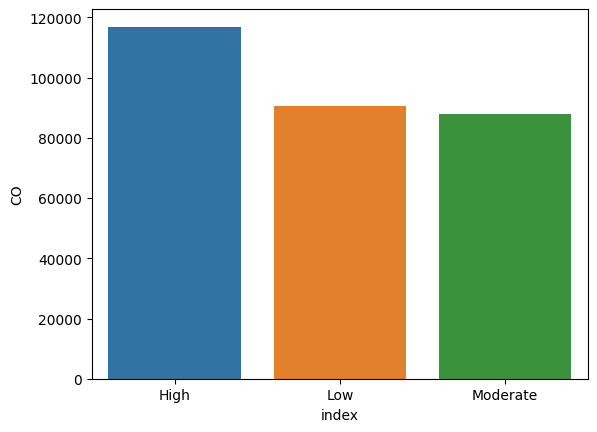

In [7]:
sns.barplot(y_train.value_counts().reset_index(), x="index", y="CO")

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
model = GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [10]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [11]:
d1 = dict()
for k in range(1,14):
    exec(f"d1['testscore_day{k}'] = model.score(df_ind{k},df_dep{k})*100")

df_result = pd.DataFrame(d1.items())

In [12]:
df_result.rename(columns={0:"Days", 1: "actual"}, inplace=True)

In [13]:
df_result["actual"].mean()

79.5716556095462

# By using the SMOTE techniques over_sample the data

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [15]:
X_smote.shape,X_train.shape

((350760, 6), (295437, 6))

In [16]:
y_smote.shape,y_train.shape

((350760,), (295437,))

In [17]:
model_smote = GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [18]:
model_smote.fit(X_smote, y_smote)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [19]:
d2 = dict()
for k in range(1,14):
    exec(f"d2['testscore_day{k}'] = model_smote.score(df_ind{k},df_dep{k})*100")

df_result_smote = pd.DataFrame(d2.items())

In [20]:
df_result_smote.rename(columns={0:"Days", 1: "smote"}, inplace=True)

In [21]:
df_result_smote["smote"].mean()

79.61012872839078

# By using the OVER techniques over_sample the data

In [22]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X_over, y_over = over.fit_resample(X_train, y_train)

In [23]:
X_over.shape,X_train.shape

((350760, 6), (295437, 6))

In [24]:
y_over.shape,y_train.shape

((350760,), (295437,))

In [25]:
model_over = GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [26]:
model_over.fit(X_over, y_over)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [27]:
d3 = dict()
for k in range(1,14):
    exec(f"d3['testscore_day{k}'] = model_over.score(df_ind{k},df_dep{k})*100")

df_result_over = pd.DataFrame(d3.items())

In [28]:
df_result_over.rename(columns={0:"Days", 1: "over"}, inplace=True)

In [29]:
df_result_over["over"].mean()

79.56416418168068

# By using the UNDER techniques under_sample the data

In [30]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [31]:
X_under.shape,X_train.shape

((263529, 6), (295437, 6))

In [32]:
y_under.shape,y_train.shape

((263529,), (295437,))

In [33]:
model_under = GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [34]:
model_under.fit(X_under, y_under)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [35]:
d4 = dict()
for k in range(1,14):
    exec(f"d4['testscore_day{k}'] = model_under.score(df_ind{k},df_dep{k})*100")

df_result_under = pd.DataFrame(d4.items())

In [36]:
df_result_under.rename(columns={0:"Days", 1: "under"}, inplace=True)

In [37]:
df_result_under["under"].mean()

79.67451361306877

In [38]:
df_compare = pd.concat([df_result,df_result_over["over"],df_result_smote["smote"],df_result_under["under"]], axis=1)

In [39]:
import plotly.express as px

In [40]:
fig = px.line(data_frame=df_compare, x=range(1,14), 
        y = ["actual", "over", "smote", "under"],
        markers=True, width = None, height = None, template="plotly_dark", range_x= [0.5,13.5], render_mode="webgl",
       labels = {"x" : "Experiment Day", "value" : "Score Mean μ"}, title = "Imbalance Performance of 13 days w.r.t 7th day using Gradient Boosting")

fig.update_traces( line=dict(width=2.5), marker = dict(size=10))
fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [i for i in range(1,14)], ticktext = [f'Day{i}' for i in range(1,14)]))
fig.show()

In [41]:
actual_model = GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [42]:
actual_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=60)

In [77]:
actual_model.feature_importances_

array([0.01515573, 0.00546338, 0.        , 0.0148371 , 0.09358627,
       0.87095751])

In [126]:
importance = pd.DataFrame([actual_model.feature_importances_*100, actual_model.feature_names_in_], index = ["Importance", "Features"])

In [130]:
importance.T["Features"]

Importance     Features
0   1.515573     Humidity
1   0.546338  Temperature
2        0.0         Flow
3    1.48371       Heater
4   9.358627     Sensor_1
5  87.095751     Sensor_2

In [139]:
px.bar(importance.T, x="Features", y="Importance")

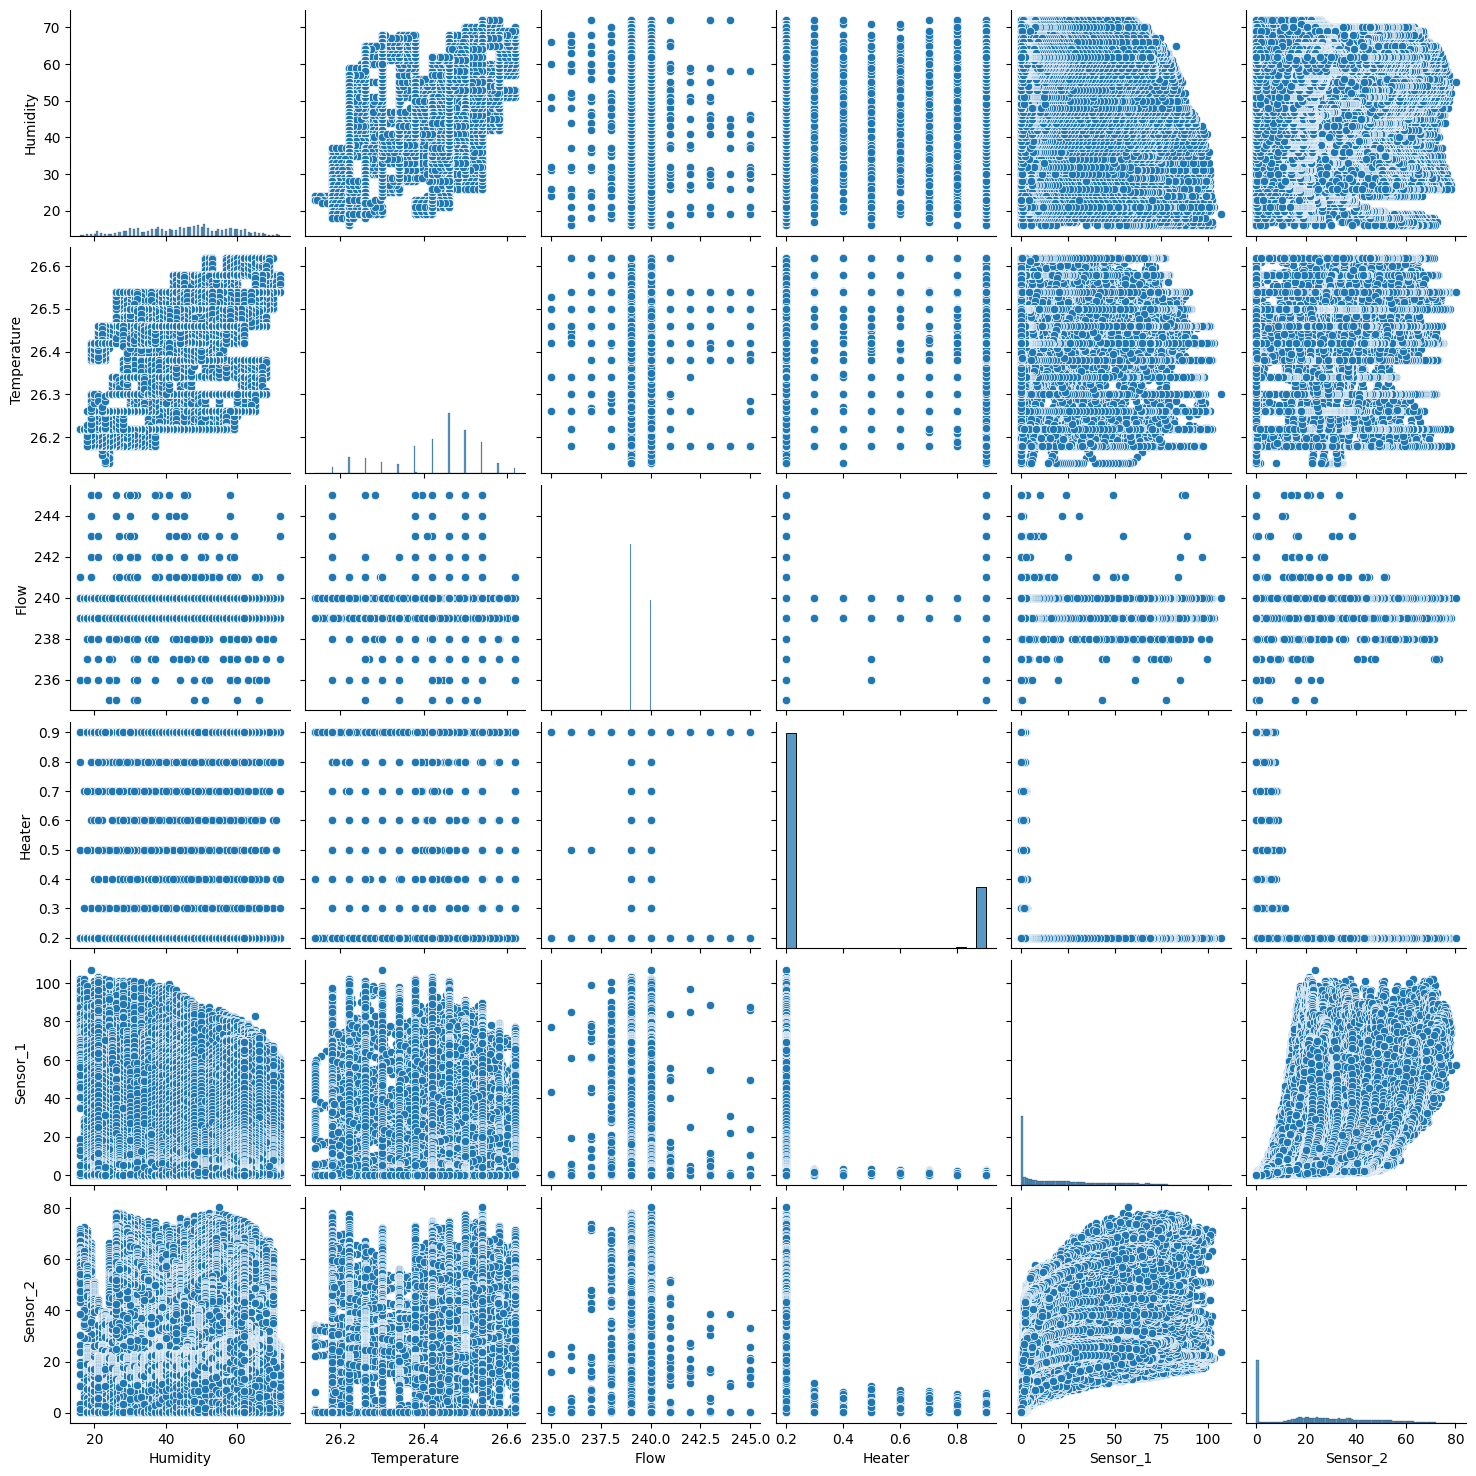

In [4]:
sns.pairplot(df_ind2)

In [43]:
import pickle

In [45]:
pickle.dump(actual_model, open("/home/dftml/Project/Sensor_Gas/model.pkl", "wb"))

In [46]:
pickled_model = pickle.load(open('/home/dftml/Project/Sensor_Gas/model.pkl', 'rb'))

In [48]:
pickled_model.score(X_smote,y_smote)

0.8184314060896339

In [49]:
X_smote.head()

Humidity  Temperature  Flow  Heater  Sensor_1   Sensor_2
0        49        26.62   243     0.2  3.093086  43.274857
1        49        26.62   242     0.2  2.908671  42.803929
2        49        26.62   241     0.2  2.745114  37.933729
3        49        26.62   241     0.2  0.144286   0.254586
4        49        26.62   241     0.9  0.112371   0.118814

In [121]:
pd.DataFrame(X_smote.iloc[3017,:]).T

Humidity  Temperature   Flow  Heater  Sensor_1   Sensor_2
3017      47.0        26.54  240.0     0.2  3.431057  17.151871

In [115]:
y_smote[y_smote == "High"].head(100)

2923    High
2924    High
2925    High
2926    High
2927    High
        ... 
3018    High
3019    High
3020    High
3021    High
3022    High
Name: CO, Length: 100, dtype: object

In [120]:
pickled_model.predict(pd.DataFrame(X_smote.iloc[3017,:]).T)

array(['High'], dtype=object)

In [72]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350760 entries, 0 to 350759
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Humidity     350760 non-null  int64  
 1   Temperature  350760 non-null  float64
 2   Flow         350760 non-null  int64  
 3   Heater       350760 non-null  float64
 4   Sensor_1     350760 non-null  float64
 5   Sensor_2     350760 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 16.1 MB


In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
trial = DecisionTreeClassifier()

In [149]:
path = trial.cost_complexity_pruning_path(X_train,y_train)

In [150]:
ccp, imppur = path.ccp_alphas, path.impurities

In [ ]:
# l5 = list()
# for i in ccp:
#     model_trial = DecisionTreeClassifier(ccp_alpha=i)
#     model_trial.fit(X_train, y_train)
    
#     d5 = dict()
#     for k in range(1,14):
#         exec(f"d5['testscore_day{k}'] = model_trial.score(df_ind{k},df_dep{k})")

#     l5.append(d5)

In [ ]:
df_result_over = pd.DataFrame(l5) memoryview()